In [103]:
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
#Load & read datasets into a Pandas DataFrame
EV_Data_df=pd.read_csv('Cleaned_Data_Sets/Cleaned_EV_Data.csv')
census_data_df=pd.read_csv('Cleaned_Data_Sets/Cleaned_Census_Income_Data.csv')

In [92]:
EV_Data_df.shape

(124716, 11)

In [94]:
ev_wa_s = EV_Data_df["State"] == "WA"
ev_wa_df = EV_Data_df[ev_wa_s] 
ev_wa_df

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Vehicle Location Longitude,Vehicle Location Latitude
0,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322,-120.56916,46.58514
3,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),289,-120.56916,46.58514
4,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),14,-122.18384,47.80310
5,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),84,-122.20596,47.97659
6,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),215,-122.64681,47.73689
...,...,...,...,...,...,...,...,...,...,...,...
124711,Snohomish,Monroe,WA,98272.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),0,-121.98087,47.85260
124712,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),26,-122.52054,47.26887
124713,Whatcom,Bellingham,WA,98226.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0,-122.49756,48.79990
124714,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),238,-122.46495,47.16778


In [95]:
census_data_df

,County,Median income (dollars)
0,Adams,51601
1,Asotin,53941
2,Benton,72046
3,Chelan,61304
4,Clallam,55090
5,Clark,77184
6,Columbia,61779
7,Cowlitz,58791
8,Douglas,65730
9,Ferry,41685


In [133]:
#Create a bar graph to compare median income to county
median_inc=pd.DataFrame(pd.value_counts(ev_wa_df["County"]))
median_inc

,County
King,65268
Snohomish,14061
Pierce,9538
Clark,7398
Thurston,4548
Kitsap,4148
Whatcom,3101
Spokane,3080
Benton,1567
Skagit,1406


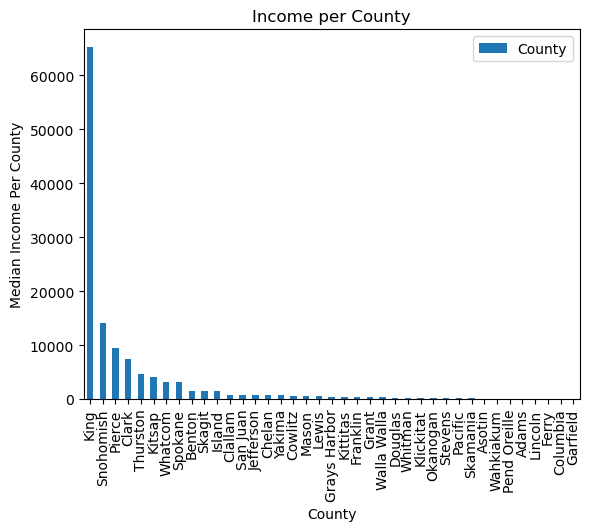

In [135]:
%matplotlib inline
#pandas plot
median_inc.plot(kind = "bar")
plt.title("Income per County")
plt.ylabel("Median Income Per County")
plt.xlabel("County")
plt.show()

In [97]:
#Combine data into a single dataset
county_data_complete_df=pd.merge(ev_wa_df, census_data_df,how="inner", on=["County","County"])
county_data_complete_df["State"].value_counts()

WA    119481
Name: State, dtype: int64

In [98]:
#Group by county
County_gb=county_data_complete_df.groupby(['County'])
County_gb

In [99]:
#Count number of vehicles in each County
county_vehicle_counts = County_gb.count()["Model"]
county_vehicle_counts

County
Adams           35
Asotin          52
Benton        1567
Chelan         731
Clallam        779
Clark         7392
Columbia        13
Cowlitz        618
Douglas        236
Ferry           23
Franklin       406
Garfield         4
Grant          362
Island        1402
Jefferson      763
King         65149
Kitsap        4143
Kittitas       429
Klickitat      196
Lewis          473
Lincoln         33
Mason          594
Okanogan       167
Pacific        157
Pierce        9525
Skagit        1403
Skamania       141
Snohomish    14039
Spokane       3080
Stevens        159
Thurston      4543
Yakima         687
Name: Model, dtype: int64

In [102]:
#Income per County
county_income_s = County_gb.mean()["Median income (dollars)"]

/var/folders/5g/96csl0h529z2pqx9_m5575sw0000gn/T/ipykernel_38717/2067503824.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  county_income_s = County_gb.mean()["Median income (dollars)"]


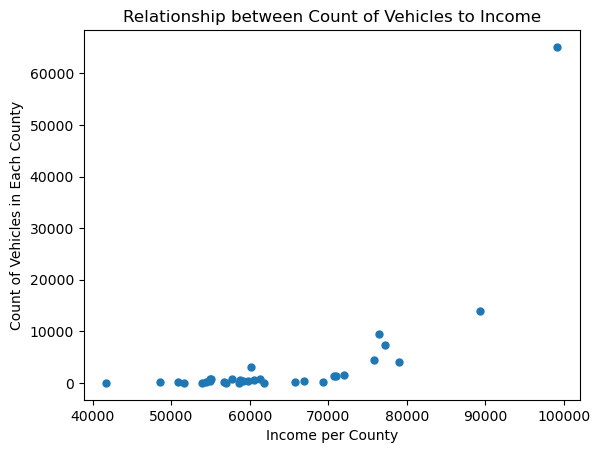

In [126]:
# Generate a scatter plot of the relationship between count of vehicles per county to income
plt.scatter(county_income_s.values, county_vehicle_counts.values,s=25)


plt.title("Relationship between Count of Vehicles to Income")
# create a scatterplot of x and y data
plt.xlabel("Income per County")
plt.ylabel("Count of Vehicles in Each County")
# show the plot
plt.show()